In [ ]:
import os,sys
#set the path to the Sandbox repository
sys.path.append('../../')
sys.path.append('../../../gempy')
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

#import gempy
import gempy as gp
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN"
#import the sandbox
import sandbox as sb
# set the path to the calibration file
CALIBRATION_FILE = '../calibration_files/my_calibration.json'

import numpy as np
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
calibrationdata = sb.CalibrationData(file=CALIBRATION_FILE)
kinect = sb.KinectV2(calibrationdata)
projector = sb.Projector(calibrationdata)


In [ ]:
data_path = '../tutorials/04_GempyModule/Example_Models/inputdata/'

In [ ]:
def create_example_model(name, extent = [0,1000,0,1000,0,2300], 
                         do_sections=False, 
                         change_color=False, 
                         data_path=data_path, 
                         theano_optimizer='fast_compile', 
                         resolution = [2,2,2] ):
    
    all_models = ['Horizontal_layers', 'Recumbent_fold', 'Anticline',
             'Pinchout', 'Fault', 'Unconformity']
    
    assert name in all_models, 'possible model names are '+ str(all_models)
    geo_model = gp.create_model(name)
    
    if name == 'Horizontal_layers':
        geo_model = gp.init_data(geo_model, extent=extent,resolution=resolution, 
                                path_o = data_path+"model1_orientations.csv",
                                path_i = data_path+"model1_surface_points.csv")
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#9f0052', 'rock1': '#e36746', 
                                                 'basement': '#f9f871'})

        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
    
    elif name == 'Recumbent_fold':
        geo_model = gp.init_data(geo_model, extent=extent,resolution=resolution, 
                        path_o = data_path + "model3_orientations.csv",
                        path_i = data_path + "model3_surface_points.csv") 
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#e36746', 'rock1': '#c0539f', 
                                                 'basement': '#006fa8'})
            
    elif name == 'Anticline':
        geo_model = gp.init_data(geo_model, extent=extent, resolution=resolution, 
                                  path_o = data_path + "model2_orientations.csv",
                                  path_i = data_path + "model2_surface_points.csv")
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        
    elif name == 'Pinchout':
        geo_model = gp.init_data(geo_model, extent=extent,resolution=resolution, 
                                path_o = data_path + "model4_orientations.csv",
                                path_i = data_path + "model4_surface_points.csv")
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#a1b455', 'rock1': '#ffbe00', 
                                                 'basement': '#006471'})
            
    elif name == 'Fault':
        geo_model = gp.init_data(geo_model, extent=extent,resolution=resolution, 
                                path_o = data_path + "model5_orientations.csv",
                                path_i = data_path + "model5_surface_points.csv") 
        gp.map_series_to_surfaces(geo_model, {"Fault_Series":'fault', 
                                 "Strat_Series": ('rock2','rock1')})
        geo_model.set_is_fault(['Fault_Series'], change_color=False)
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#00c2d0', 'rock1': '#a43d00', 
                                                 'basement': '#76a237', 'fault':'#000000'})
            
    elif name == 'Unconformity':
        geo_model = gp.init_data(geo_model, extent=extent, resolution=resolution, 
                                path_o = data_path + "model6_orientations.csv",
                                path_i = data_path + "model6_surface_points.csv")
        
        gp.map_series_to_surfaces(geo_model, {"Strat_Series1": ('rock3'),
                                             "Strat_Series2": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        
    if do_sections:
        geo_model.set_section_grid({'section'+' '+name:([0,500],[1000,500],[30,30])})

    interp_data = gp.set_interpolation_data(geo_model, compile_theano=True,
                                        theano_optimizer=theano_optimizer)

    _=gp.compute_model(geo_model, compute_mesh=False)
    
    if do_sections:
        gp.plot.plot_section_by_name(geo_model,'section'+' '+name, show_data=False)
        
    return geo_model

In [ ]:
all_models = ['Horizontal_layers', 'Recumbent_fold', 'Anticline','Pinchout', 'Fault', 'Unconformity']

model_dict = {}
for model in all_models:
    model_dict.update({model: create_example_model(model)})

In [ ]:
name = 'Anticline'
geo_model = model_dict[name]

In [ ]:
model_dict[name]

In [ ]:
aruco = sb.ArucoMarkers(kinect, calibrationdata)

In [ ]:
gpsb=sb.GemPyModule(geo_model, calibrationdata, kinect, projector, aruco)

In [ ]:
gpsb.setup()

In [ ]:
gpsb.run()

In [ ]:
gpsb.stop()

In [ ]:
df =gpsb.modelspace_arucos
df

In [ ]:
df = df.loc[df.is_inside_box, ('box_x', 'box_y')]

In [ ]:
df

In [ ]:
from sandbox.sensor.kinectV2 import KinectV2
import matplotlib.pyplot as plt

In [ ]:
kinect = KinectV2()


In [ ]:
color = kinect.get_color()
print(color.shape)
print(color[0])
plt.imshow(color, origin="lower left")
plt.show()

In [ ]:
color = kinect.get_color()
print(color.shape)
print(color[0])
plt.imshow(color, origin="lower left")
plt.show()

In [ ]:
kinect.listener.hasNewFrame()

In [ ]:
kinect.listener.waitForNewFrame

In [ ]:
frames = kinect.listener.waitForNewFrame(milliseconds=50)
if frames:
    print(True)
    kinect.listener.release(frames)
else:
    print(False)


In [ ]:
kinect.listener.hasNewFrame()

In [ ]:
kinect.listener.waitForNewFrame()

In [1]:








from pylibfreenect2 import Freenect2, SyncMultiFrameListener
from pylibfreenect2 import FrameType, Registration, Frame, FrameMap


import numpy as np
import matplotlib.pyplot as plt



In [2]:
fn = Freenect2()

num_devices = fn.enumerateDevices()
assert num_devices > 0

serial = fn.getDefaultDeviceSerialNumber()

device = fn.openDevice(serial)


listener = SyncMultiFrameListener(
    FrameType.Color | FrameType.Ir | FrameType.Depth)

# Register listeners
device.setColorFrameListener(listener)
device.setIrAndDepthFrameListener(listener)

device.startStreams(rgb=True, depth=True)

# Registration
#registration = Registration(device.getIrCameraParams(),
#                            device.getColorCameraParams())
#undistorted = Frame(512, 424, 4)
#registered = Frame(512, 424, 4)

# optional parameters for registration
#bigdepth = Frame(1920, 1082, 4)
#color_depth_map = np.zeros((424, 512), np.int32)

# test if we can get two frames at least
#frames = listener.waitForNewFrame()
#listener.release(frames)

# frames as a first argment also should work
frames = FrameMap()
listener.waitForNewFrame(frames)

color = frames[FrameType.Color]
ir = frames[FrameType.Ir]
depth = frames[FrameType.Depth]

assert color.width == 1920
assert color.height == 1080
assert color.bytes_per_pixel == 4

assert ir.width == 512
assert ir.height == 424
assert ir.bytes_per_pixel == 4

assert depth.width == 512
assert depth.height == 424
assert depth.bytes_per_pixel == 4

listener.release(frames)

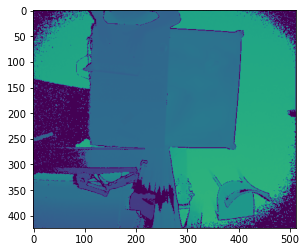

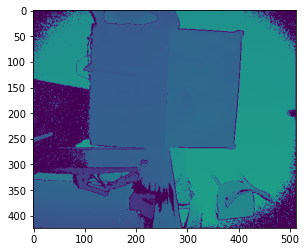

In [3]:
# frames as a first argment also should work
frames = FrameMap()
listener.waitForNewFrame(frames)

#color = frames[FrameType.Color]
#ir = frames[FrameType.Ir]
depth = frames[FrameType.Depth]

#plt.imshow(color.asarray())
#plt.show()
#plt.imshow(ir.asarray())
#plt.show()
plt.imshow(depth.asarray())
plt.show()

listener.release(frames)

frames = FrameMap()
listener.waitForNewFrame(frames)

#color = frames[FrameType.Color]
#ir = frames[FrameType.Ir]
depth = frames[FrameType.Depth]

#plt.imshow(color.asarray())
#plt.show()
#plt.imshow(ir.asarray())
#plt.show()
plt.imshow(depth.asarray())
plt.show()

listener.release(frames)

In [ ]:
color.bytes_per_pixel




In [ ]:
device.startStreams(rgb=True, depth=True)

In [ ]:
device.

In [ ]:
frames = FrameMap()
listener.waitForNewFrame(frames)


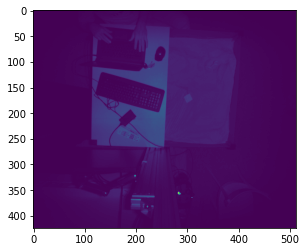

In [155]:
frames = FrameMap()
listener.waitForNewFrame(frames, milliseconds=100)
depth = frames['depth'].asarray()
listener.release(frames)
plt.imshow(depth)
plt.show()

In [158]:
depth

array([[  0.      ,  43.403664,  91.12167 , ..., 103.2541  ,  78.946434,
          0.      ],
       [  0.      ,  97.78309 ,  80.66582 , ...,  95.10572 , 133.1635  ,
          0.      ],
       [  0.      ,  35.637985,  73.42755 , ...,  94.74438 , 174.88264 ,
          0.      ],
       ...,
       [  0.      , 343.2218  , 332.28186 , ..., 151.41153 , 102.05708 ,
          0.      ],
       [  0.      , 289.23218 , 273.75934 , ..., 112.23509 ,  61.32635 ,
          0.      ],
       [  0.      , 267.14508 , 362.62323 , ..., 123.06219 ,  65.804016,
          0.      ]], dtype=float32)

In [110]:
listener.release(frames)

In [ ]:
import numpy as np
import cv2
import sys
from pylibfreenect2 import Freenect2, SyncMultiFrameListener
from pylibfreenect2 import FrameType, Registration, Frame
from pylibfreenect2 import createConsoleLogger, setGlobalLogger
from pylibfreenect2 import LoggerLevel

try:
    from pylibfreenect2 import OpenGLPacketPipeline
    pipeline = OpenGLPacketPipeline()
except:
    try:
        from pylibfreenect2 import OpenCLPacketPipeline
        pipeline = OpenCLPacketPipeline()
    except:
        from pylibfreenect2 import CpuPacketPipeline
        pipeline = CpuPacketPipeline()
print("Packet pipeline:", type(pipeline).__name__)

# Create and set logger
logger = createConsoleLogger(LoggerLevel.Debug)
setGlobalLogger(logger)

fn = Freenect2()
num_devices = fn.enumerateDevices()
if num_devices == 0:
    print("No device connected!")
    sys.exit(1)

serial = fn.getDeviceSerialNumber(0)
device = fn.openDevice(serial, pipeline=pipeline)

listener = SyncMultiFrameListener(
    FrameType.Color | FrameType.Ir | FrameType.Depth)

# Register listeners
device.setColorFrameListener(listener)
device.setIrAndDepthFrameListener(listener)

device.start()

# NOTE: must be called after device.start()
registration = Registration(device.getIrCameraParams(),
                            device.getColorCameraParams())

undistorted = Frame(512, 424, 4)
registered = Frame(512, 424, 4)

# Optinal parameters for registration
# set True if you need
need_bigdepth = False
need_color_depth_map = False

bigdepth = Frame(1920, 1082, 4) if need_bigdepth else None
color_depth_map = np.zeros((424, 512),  np.int32).ravel() \
    if need_color_depth_map else None

while True:
    frames = listener.waitForNewFrame()

    color = frames["color"]
    ir = frames["ir"]
    depth = frames["depth"]

    registration.apply(color, depth, undistorted, registered,
                       bigdepth=bigdepth,
                       color_depth_map=color_depth_map)

    # NOTE for visualization:
    # cv2.imshow without OpenGL backend seems to be quite slow to draw all
    # things below. Try commenting out some imshow if you don't have a fast
    # visualization backend.
    cv2.imshow("ir", ir.asarray() / 65535.)
    cv2.imshow("depth", depth.asarray() / 4500.)
    cv2.imshow("color", cv2.resize(color.asarray(),
                                   (int(1920 / 3), int(1080 / 3))))
    cv2.imshow("registered", registered.asarray(np.uint8))

    if need_bigdepth:
        cv2.imshow("bigdepth", cv2.resize(bigdepth.asarray(np.float32),
                                          (int(1920 / 3), int(1082 / 3))))
    if need_color_depth_map:
        cv2.imshow("color_depth_map", color_depth_map.reshape(424, 512))

    listener.release(frames)

    key = cv2.waitKey(delay=1)
    if key == ord('q'):
        break

device.stop()
device.close()

sys.exit(0)

Packet pipeline: OpenGLPacketPipeline
